# links

https://www.analyticsvidhya.com/blog/2021/07/detecting-fake-news-with-natural-language-processing/

https://www.analyticsvidhya.com/blog/2021/03/introduction-to-gated-recurrent-unit-gru/

https://medium.com/@saitejaponugoti/stop-words-in-nlp-5b248dadad47

https://thepythoncode.com/article/fake-news-classification-in-python

https://dl.acm.org/doi/10.1016/j.procs.2024.03.237

https://www.youtube.com/watch?app=desktop&v=rdz0UqQz5Sw&t=0s

https://medium.com/@rajvir.ahmed.shuvo/improving-fake-news-detection-a-journey-through-text-classification-c521b1509cee

https://medium.com/@carmenscartezini/fake-news-classification-tensorflow-x-pytorch-2a8f471a3713

https://towardsdatascience.com/detecting-fake-news-with-and-without-code-dd330ed449d9

https://towardsdatascience.com/turbo-charge-your-spacy-nlp-pipeline-551435b664ad



In [1]:
import pandas as pd

train = pd.read_parquet('data/train.parquet')
display(train)

,title,author,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...
20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   20242 non-null  object
 1   author  18843 non-null  object
 2   text    20761 non-null  object
 3   label   20800 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 650.1+ KB


In [3]:
train.isnull().sum()

title      558
author    1957
text        39
label        0
dtype: int64

In [4]:
cleaned_df = train.dropna(subset=["title", "text"])
cleaned_df.info()

cleaned_df["author"] = cleaned_df["author"].fillna("Unknown")
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20203 entries, 0 to 20799
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   20203 non-null  object
 1   author  18285 non-null  object
 2   text    20203 non-null  object
 3   label   20203 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 789.2+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 20203 entries, 0 to 20799
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   20203 non-null  object
 1   author  20203 non-null  object
 2   text    20203 non-null  object
 3   label   20203 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 789.2+ KB


/tmp/ipykernel_10869/2309681875.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["author"] = cleaned_df["author"].fillna("Unknown")


In [5]:
cleaned_df["merged_text"] = cleaned_df["title"] + " " + cleaned_df["text"]
display(cleaned_df["merged_text"])

/tmp/ipykernel_10869/1132859349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["merged_text"] = cleaned_df["title"] + " " + cleaned_df["text"]


0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        FLYNN: Hillary Clinton, Big Woman on Campus - ...
2        Why the Truth Might Get You Fired Why the Trut...
3        15 Civilians Killed In Single US Airstrike Hav...
4        Iranian woman jailed for fictional unpublished...
                               ...                        
20795    Rapper T.I.: Trump a ’Poster Child For White S...
20796    N.F.L. Playoffs: Schedule, Matchups and Odds -...
20797    Macy’s Is Said to Receive Takeover Approach by...
20798    NATO, Russia To Hold Parallel Exercises In Bal...
20799    What Keeps the F-35 Alive   David Swanson is a...
Name: merged_text, Length: 20203, dtype: object

In [6]:
cleaned_df.loc[:, "merged_text"] = (
    cleaned_df["merged_text"]
    .str.lower()
    .replace(r'http[\w:/\.]+', ' ', regex=True)  # Remove URLs
    .replace(r"[^a-z\s'’]", " ", regex=True)      # Remove everything except lowercase letters, spaces, and apostrophes
    .replace(r'\s\s+', ' ', regex=True)         # Collapse multiple spaces
    .str.strip()                                # Remove leading/trailing spaces
)
display(cleaned_df["merged_text"])

0        house dem aide we didn’t even see comey’s lett...
1        flynn hillary clinton big woman on campus brei...
2        why the truth might get you fired why the trut...
3        civilians killed in single us airstrike have b...
4        iranian woman jailed for fictional unpublished...
                               ...                        
20795    rapper t i trump a ’poster child for white sup...
20796    n f l playoffs schedule matchups and odds the ...
20797    macy’s is said to receive takeover approach by...
20798    nato russia to hold parallel exercises in balk...
20799    what keeps the f alive david swanson is an aut...
Name: merged_text, Length: 20203, dtype: object

In [7]:
import contractions
cleaned_df["merged_text"] = cleaned_df["merged_text"].apply(
    lambda x: contractions.fix(x) if isinstance(x, str) else x
)
display(cleaned_df["merged_text"])

/tmp/ipykernel_10869/1282668482.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["merged_text"] = cleaned_df["merged_text"].apply(


0        house dem aide we did not even see comey’s let...
1        flynn hillary clinton big woman on campus brei...
2        why the truth might get you fired why the trut...
3        civilians killed in single us airstrike have b...
4        iranian woman jailed for fictional unpublished...
                               ...                        
20795    rapper t i trump a ’poster child for white sup...
20796    n f l playoffs schedule matchups and odds the ...
20797    macy’s is said to receive takeover approach by...
20798    nato russia to hold parallel exercises in balk...
20799    what keeps the f alive david swanson is an aut...
Name: merged_text, Length: 20203, dtype: object

In [8]:
cleaned_df['merged_text'] = cleaned_df['merged_text'].replace(r"’", "", regex=True)
display(cleaned_df["merged_text"])


/tmp/ipykernel_10869/449746528.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['merged_text'] = cleaned_df['merged_text'].replace(r"’", "", regex=True)


0        house dem aide we did not even see comeys lett...
1        flynn hillary clinton big woman on campus brei...
2        why the truth might get you fired why the trut...
3        civilians killed in single us airstrike have b...
4        iranian woman jailed for fictional unpublished...
                               ...                        
20795    rapper t i trump a poster child for white supr...
20796    n f l playoffs schedule matchups and odds the ...
20797    macys is said to receive takeover approach by ...
20798    nato russia to hold parallel exercises in balk...
20799    what keeps the f alive david swanson is an aut...
Name: merged_text, Length: 20203, dtype: object

In [9]:
import spacy
from spacy.cli import download

# Download the SpaCy model if not already installed
model_name = "en_core_web_sm"

try:
    spacy_model = spacy.load(model_name)
    print(f"Successfully loaded model: {model_name}")
except OSError:
    print(f"Model '{model_name}' not found. Downloading...")
    download(model_name)
    spacy_model = spacy.load(model_name)
    print(f"Successfully downloaded and loaded model: {model_name}")

Successfully loaded model: en_core_web_sm


In [10]:
stopwords = spacy_model.Defaults.stop_words
print(stopwords)

{'ca', 'nine', 'n’t', 'whole', 'even', 'whence', 'just', 'than', 'below', 'should', 'as', 'itself', 'used', 'but', 'may', 'into', 'ten', 'somewhere', 'nothing', 'afterwards', 'between', 'namely', 'per', 'often', 'our', 'ours', 'was', 'beside', 'up', 'before', 'everything', '‘s', 'ever', 'less', 'keep', 'to', 'name', 'any', 'among', 'that', 'might', 'did', 'using', 'go', 'much', 'anyway', 'whoever', 'hers', 'since', 'doing', 'one', 'this', 'cannot', 'them', 'amount', 'i', 'against', 'not', 'rather', 'where', 'whereby', 'never', 'on', 'then', 'who', 'across', 'latter', 'top', 'nowhere', 'became', 'somehow', 'forty', 'full', 'many', 'thereupon', "'s", 'his', 'ourselves', 'really', 'both', 'sometime', 'seems', 'why', 'done', 'anyone', 'whereupon', 'it', 'also', 'always', 'we', 'yourself', 'becoming', 'over', 'be', 'please', 'anything', 'thus', 'still', 'no', 'hereby', 'fifty', 'upon', 'former', 'herself', 'made', 'eight', 'us', 'yours', 'next', 'which', 'fifteen', 'twenty', 'nobody', '’ll'

In [11]:
def remove_stopwords(text):
    tokens = text.split()
    filtered_tokens = [token for token in tokens if token.lower() not in stopwords]
    return ' '.join(filtered_tokens)

cleaned_df['cleaned_text'] = cleaned_df['merged_text'].apply(remove_stopwords)
display(cleaned_df["cleaned_text"])

/tmp/ipykernel_10869/1133516218.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['cleaned_text'] = cleaned_df['merged_text'].apply(remove_stopwords)


0        house dem aide comeys letter jason chaffetz tw...
1        flynn hillary clinton big woman campus breitba...
2        truth fired truth fired october tension intell...
3        civilians killed single airstrike identified v...
4        iranian woman jailed fictional unpublished sto...
                               ...                        
20795    rapper t trump poster child white supremacy ra...
20796    n f l playoffs schedule matchups odds new york...
20797    macys said receive takeover approach hudsons b...
20798    nato russia hold parallel exercises balkans na...
20799    keeps f alive david swanson author activist jo...
Name: cleaned_text, Length: 20203, dtype: object

In [12]:
nlp = spacy.load('en_core_web_sm', disable=['tagger', 'parser', 'ner'])
nlp.add_pipe('sentencizer')

In [13]:
import os

num_cores = os.cpu_count()
print(f"Number of cores: {num_cores}")


Number of cores: 32


#### Das muss nochmal überprüft werden. Es kommt mir so vor, als würde der noch nicht die Wortstämme finden

In [14]:
from joblib import Parallel, delayed
import os

def lemmatize_pipe(doc):
    lemma_list = [str(tok.lemma_).lower() for tok in doc
                  if tok.is_alpha and tok.text.lower() not in stopwords] 
    return lemma_list

def chunker(iterable, total_length, chunksize):
    return (iterable[pos: pos + chunksize] for pos in range(0, total_length, chunksize))

def flatten(list_of_lists):
    "Flatten a list of lists to a combined list"
    return [item for sublist in list_of_lists for item in sublist]

def process_chunk(texts):
    return [
        ' '.join(str(tok.lemma_).lower() for tok in doc if tok.is_alpha and tok.text.lower() not in stopwords)
        for doc in nlp.pipe(texts, batch_size=20)
    ]

def preprocess_parallel(texts, chunksize=100):
    executor = Parallel(n_jobs=os.cpu_count()-4, backend='multiprocessing', prefer="processes")
    do = delayed(process_chunk)
    tasks = (do(chunk) for chunk in chunker(texts, len(cleaned_df), chunksize=chunksize))
    result = executor(tasks)
    return flatten(result)

In [15]:
cleaned_df['preproc_parallel'] = preprocess_parallel(cleaned_df['cleaned_text'], chunksize=1000)

/home/nikl/programming/fhdw/knowledge_engineering_ausarbeitung/fakenews_detection/.venv/lib/python3.10/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)
/home/nikl/programming/fhdw/knowledge_engineering_ausarbeitung/fakenews_detection/.venv/lib/python3.10/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)
/home/nikl/programming/fhdw/knowledge_engineering_ausarbeitung/fakenews_detection/.venv/lib/python3.10/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemm

In [16]:
display(cleaned_df['preproc_parallel'])

0        house dem aide comeys letter jason chaffetz tw...
1        flynn hillary clinton big woman campus breitba...
2        truth fired truth fired october tension intell...
3        civilians killed single airstrike identified v...
4        iranian woman jailed fictional unpublished sto...
                               ...                        
20795    rapper t trump poster child white supremacy ra...
20796    n f l playoffs schedule matchups odds new york...
20797    macys said receive takeover approach hudsons b...
20798    nato russia hold parallel exercises balkans na...
20799    keeps f alive david swanson author activist jo...
Name: preproc_parallel, Length: 20203, dtype: object

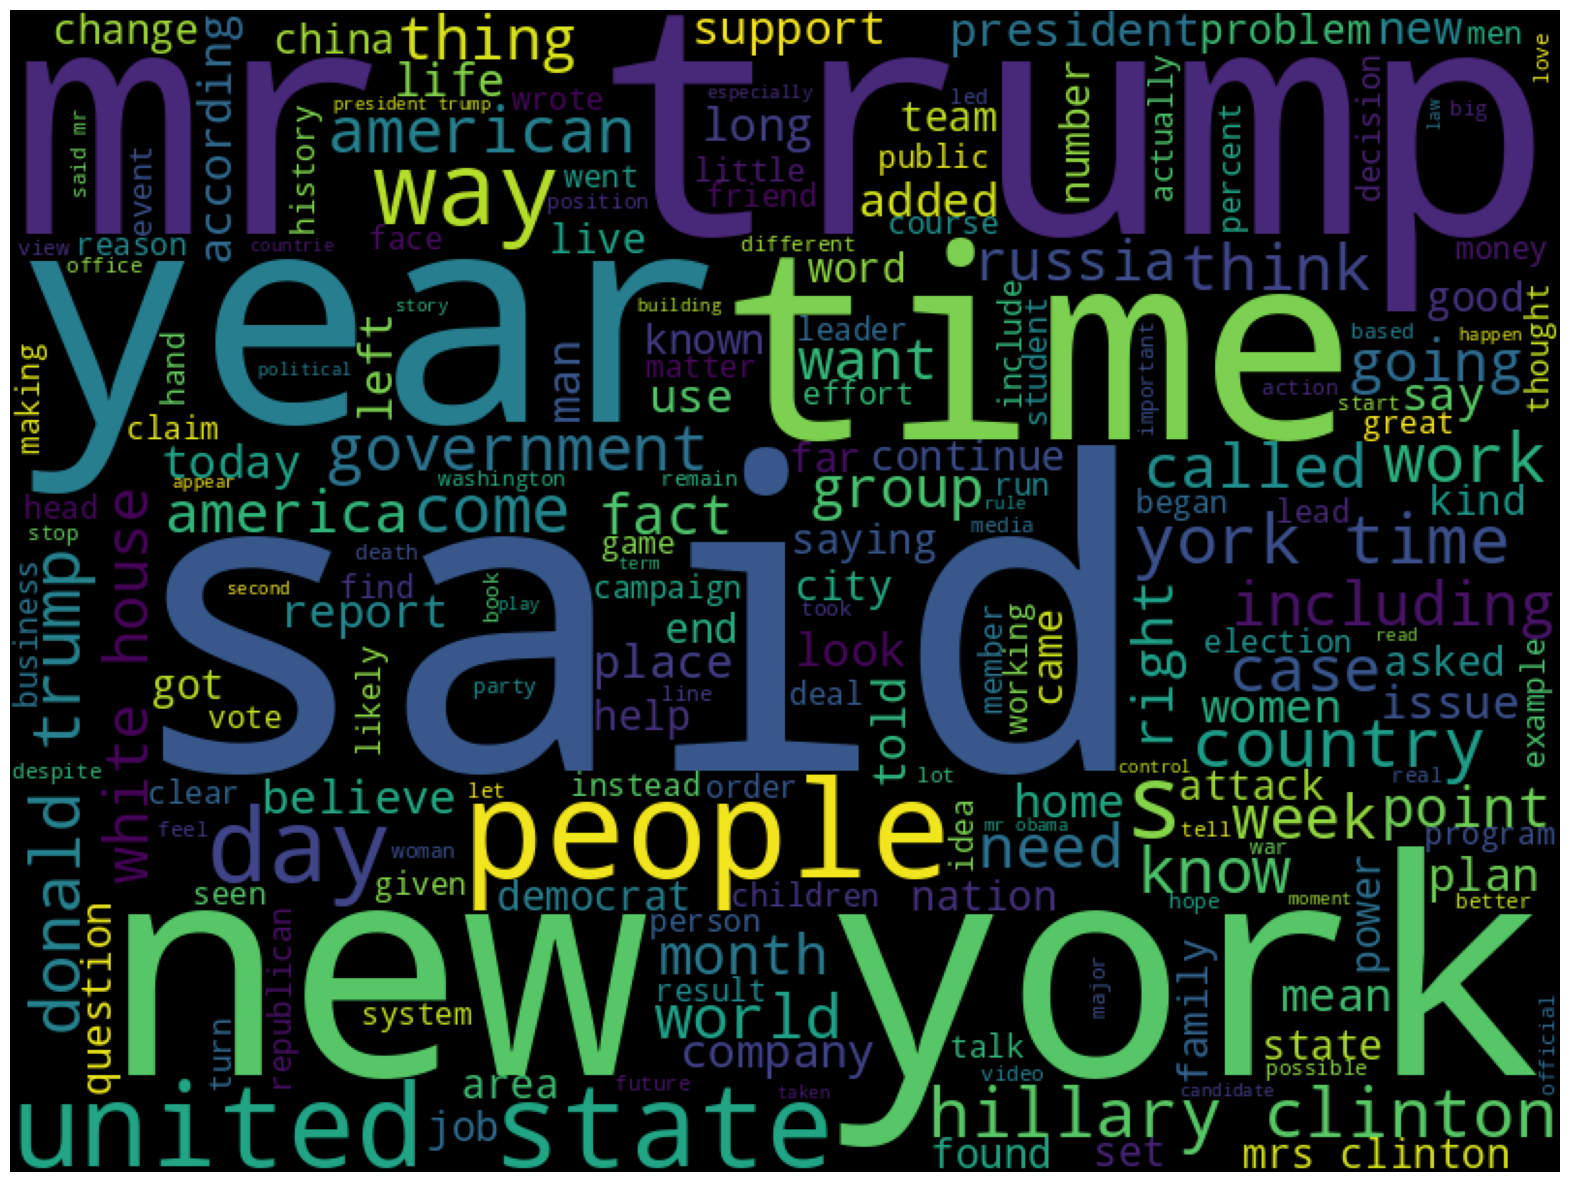

In [ ]:
# from wordcloud import WordCloud, STOPWORDS
# import matplotlib.pyplot as plt

# # initialize the word cloud
# wordcloud = WordCloud( background_color='black', width=800, height=600)
# # generate the word cloud by passing the corpus
# text_cloud = wordcloud.generate(' '.join(cleaned_df['cleaned_text']))
# # plotting the word cloud
# plt.figure(figsize=(20,30))
# plt.imshow(text_cloud)
# plt.axis('off')
# plt.show()

In [17]:
import torch
from transformers.file_utils import is_tf_available, is_torch_available
from transformers import BertTokenizerFast, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
import numpy as np
from sklearn.model_selection import train_test_split

import random

/home/nikl/programming/fhdw/knowledge_engineering_ausarbeitung/fakenews_detection/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-01-08 00:27:36.460745: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736292456.474258   10869 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736292456.478282   10869 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-08 00:27:36.492944: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimize

In [18]:
def set_seed(seed: int):
    """
    Helper function for reproducible behavior to set the seed in ``random``, ``numpy``, ``torch`` and/or ``tf`` (if
    installed).

    Args:
        seed (:obj:`int`): The seed to set.
    """
    random.seed(seed)
    np.random.seed(seed)
    if is_torch_available():
        torch.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        # ^^ safe to call this function even if cuda is not available
    if is_tf_available():
        import tensorflow as tf

        tf.random.set_seed(seed)

set_seed(1)

In [19]:
# Find the longest string in the column
longest_string = cleaned_df['preproc_parallel'].loc[cleaned_df['preproc_parallel'].str.len().idxmax()]

print(f"The longest string is: {longest_string}")
print(f"Length of the longest string: {len(longest_string)}")


The longest string is: hard working american vs government parasite hard working american vs government parasite michael snyder april th lifestyle choice produces better results hard working american government parasite actually look cold hard numbers surprise america today deeply penalize hard work greatly reward government dependence live liberal area country know game system entirely possible live comfortable existence working fact americans living government benefits decades people actually plan lives exactly need qualify benefits possible america rapidly turning european style socialist welfare state destroying nation socially financially war poverty began debt absolutely exploded poor people country obviously working wrong deeply believe having compassion going tough times having safety net care single person nation going food sleeping streets america today absolutely ridiculous people climbing aboard safety net point astounding percent americans live home receives form governmen

In [20]:
# the model we gonna train, base uncased BERT
# check text classification models here: https://huggingface.co/models?filter=text-classification
model_name = "bert-base-uncased"
# max sequence length for each document/sentence sample
max_length = 512


In [21]:
# load the tokenizer
tokenizer = BertTokenizerFast.from_pretrained(model_name, do_lower_case=True)

In [22]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
train_texts, valid_texts, train_label, valid_label = train_test_split(
    cleaned_df['preproc_parallel'], 
    cleaned_df['label'], 
    test_size=0.2, 
    random_state=42
)

# Display the shapes of the resulting datasets
print(f"Training data shape: {train_texts.shape}")
print(f"Validation data shape: {valid_texts.shape}")
print(f"Training labels shape: {train_label.shape}")
print(f"Validation labels shape: {valid_label.shape}")

Training data shape: (16162,)
Validation data shape: (4041,)
Training labels shape: (16162,)
Validation labels shape: (4041,)


In [23]:
display(train_texts)

8139     ny times sanctuary city new york times piece s...
12358    stake trumps proposed e p cuts new york times ...
9562     rick rule broadcast interview available views ...
5979     hillary clinton cancels public events vanishes...
19059    trump declared winner jon rappoport polls clos...
                               ...                        
11625    chaiwali indian restaurant feels like home new...
12329    recipe mouth watering cauliflower coconut oil ...
5553     las cajetillas de tabaco emitir n m sica de me...
885      open borders groups gird h b fights open borde...
16251    eighty wealthy new yorkers ask state governmen...
Name: preproc_parallel, Length: 16162, dtype: object

In [24]:
train_texts_list = train_texts.tolist()
valid_texts_list = valid_texts.tolist()
train_labels_list = train_label.tolist()
valid_labels_list = valid_label.tolist()

In [25]:
# tokenize the dataset, truncate when passed `max_length`, 
# and pad with 0's when less than `max_length`
train_encodings = tokenizer(train_texts_list, truncation=True, padding=True, max_length=max_length)
valid_encodings = tokenizer(valid_texts_list, truncation=True, padding=True, max_length=max_length)

In [26]:
class NewsGroupsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item["labels"] = torch.tensor([self.labels[idx]])
        return item

    def __len__(self):
        return len(self.labels)

# convert our tokenized data into a torch Dataset
train_dataset = NewsGroupsDataset(train_encodings, train_labels_list)
valid_dataset = NewsGroupsDataset(valid_encodings, valid_labels_list)

In [27]:
# load the model
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [28]:
from sklearn.metrics import accuracy_score

def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  # calculate accuracy using sklearn's function
  acc = accuracy_score(labels, preds)
  return {
      'accuracy': acc,
  }

In [29]:
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=1,              # total number of training epochs
    per_device_train_batch_size=10,  # batch size per device during training
    per_device_eval_batch_size=20,   # batch size for evaluation
    warmup_steps=100,                # number of warmup steps for learning rate scheduler
    logging_dir='./logs',            # directory for storing logs
    load_best_model_at_end=True,     # load the best model when finished training (default metric is loss)
    # but you can specify `metric_for_best_model` argument to change to accuracy or other metric
    logging_steps=200,               # log & save weights each logging_steps
    save_steps=200,
    eval_strategy="steps",     # evaluate each `logging_steps`
)

In [30]:
trainer = Trainer(
    model=model,                         # the instantiated Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=valid_dataset,          # evaluation dataset
    compute_metrics=compute_metrics,     # the callback that computes metrics of interest
)

In [31]:
# train the model
trainer.train()

Step,Training Loss,Validation Loss,Accuracy
200,0.470400,0.241807,0.919327
400,0.192700,0.126569,0.959416
600,0.135000,0.106890,0.974016


KeyboardInterrupt: 